# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech
- Nama: Wahid Hasim Santoso
- Email: wahidh697@gmail.com
- Id Dicoding: Wahid Hasim

# Persiapan

# Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Menyiapkan data yang akan digunakan

In [2]:
#load datasets
base_path_hour = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'

df = pd.read_csv(base_path_hour, delimiter=';', on_bad_lines='skip')

# Menampilkan 5 baris data pertama
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Understanding

In [3]:
print(f"the number of columns of the datasets: {df.shape[1]}")
print(f"the number of rows of the datasets: {df.shape[0]}")

the number of columns of the datasets: 37
the number of rows of the datasets: 4424


In [4]:
# Menampilkan informasi setiap kolom pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Dataset yang digunakan dalam proyek ini adalah dataset yang bersumber dari github dengan tautan berikut: https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv

Detail kolom dataset:

- **Marital status**: The marital status of the student.
-**Application mode**: The method of application used by the student.
- **Application order**: The order in which the student applied.
- **Course**: The course taken by the student.
- **Daytime/evening attendance**: Whether the student attends classes during the day or in the evening.
- **Previous qualification**: The qualification obtained by the student before enrolling in higher education.
-**Previous qualification (grade)**: Grade of previous qualification (between 0 and 200)
- **Nacionality**: The nationality of the student.
- **Mother's qualification**: The qualification of the student's mother.
- **Father's qualification**: The qualification of the student's father.
- **Mother's occupation**: The occupation of the student's mother.
- **Father's occupation**: The occupation of the student's father.
- **Admission grade**: Admission grade (between 0 and 200)
- **Displaced**: Whether the student is a displaced person.
- **Educational special needs**: Whether the student has any special educational needs.
- **Debtor**: Whether the student is a debtor.
- **Gender**: The gender of the student.
- **Scholarship holder**: Whether the student is a scholarship holder.
- **Age at enrollment**: The age of the student at the time of enrollment.
- **International**: Whether the student is an international student.
- **Curricular units 1st sem (credited)**: The number of curricular units credited by the student in the first semester.
- **Curricular units 1st sem (enrolled)**: The number of curricular units enrolled by the student in the first semester.
- **Curricular units 1st sem (evaluations)**: The number of curricular units evaluated by the student in the first semester.
- **Curricular units 1st sem (approved)**: The number of curricular units approved by the student in the first semester.

In [5]:
# Menampilkan informasi apakah data memiliki missing value
print(f"Data missing: {df.isnull().sum().sum()}")
df.isnull().sum()

Data missing: 0


Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Pada Dataset yang dimiliki tidak ada indikasi missing value pada datanya sehingga kita bisa melanjutkan ke tahapan selanjutnya

In [6]:
# Mendeteksi Duplikasi Data
df.duplicated().sum()

np.int64(0)

Pada Dataset yang dimiliki juga tidak ada indikasi duplikasi data pada datanya sehingga kita bisa melanjutkan ke tahapan selanjutnya

# Data Preparation

In [7]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [8]:
df.describe(include='object')

,Status
count,4424
unique,3
top,Graduate
freq,2209


Sejauh ini, berdasarkan pengamatan statistik ringkasan dari kolom numerik menggunakan `.describe()` pada data yang dimiliki, tidak ada data yang anomali atau tidak normal yang teramati. Untuk data kategorikal (data target) memiliki 3 value unique, untuk itu kita bisa melakukan pemerikasaan data apakah data target imbalance atau tidak

## EDA

In [9]:
data = df.copy()

# Map course codes to names
course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

data['Course_Name'] = data['Course'].map(course_mapping)

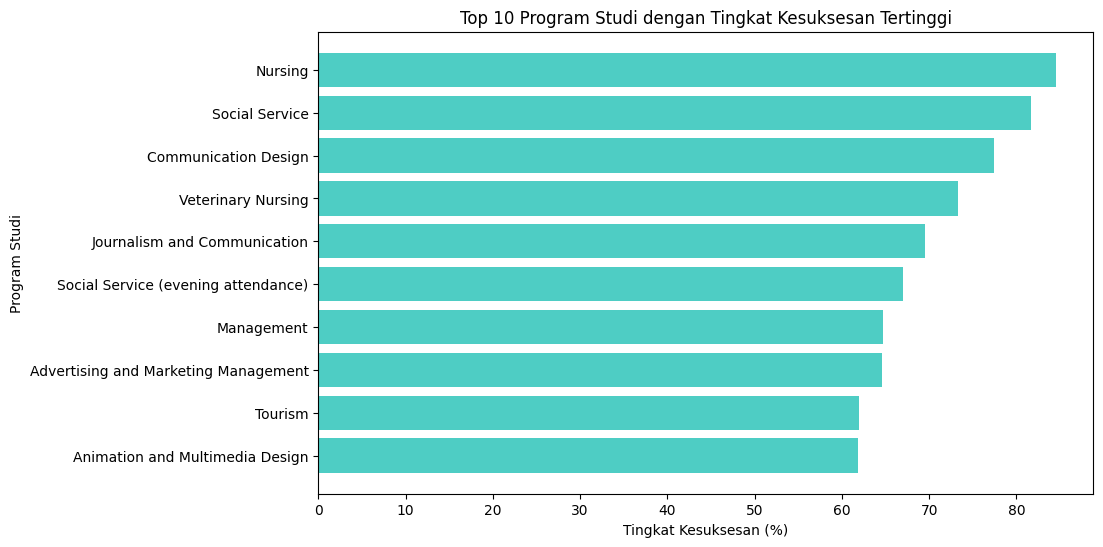

In [10]:
course_stats = data.groupby(['Course_Name', 'Status']).size().unstack().fillna(0)

for col in ['Graduate', 'Dropout', 'Enrolled']:
    if col not in course_stats.columns:
        course_stats[col] = 0

course_stats['Total'] = course_stats.sum(axis=1)
course_stats['Success_Rate'] = ((course_stats['Graduate'] + course_stats['Enrolled']) / course_stats['Total'] * 100)

top10 = course_stats.sort_values('Success_Rate', ascending=False).reset_index().head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10['Course_Name'], top10['Success_Rate'], color='#4ECDC4')
plt.xlabel('Tingkat Kesuksesan (%)')
plt.ylabel('Program Studi')
plt.title('Top 10 Program Studi dengan Tingkat Kesuksesan Tertinggi')
plt.gca().invert_yaxis()
plt.show()

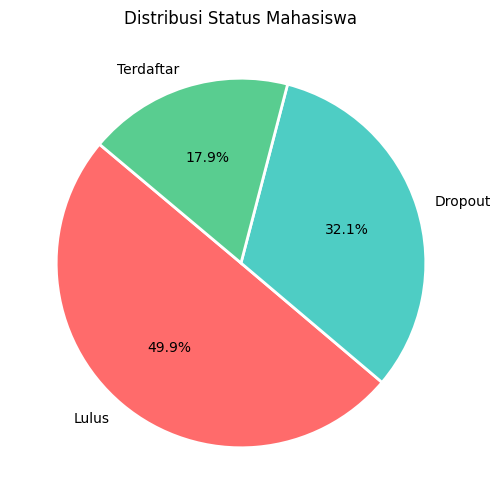

In [11]:
status_counts = df['Status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']

# Mapping status ke bahasa Indonesia
status_mapping = {'Dropout': 'Dropout', 'Graduate': 'Lulus', 'Enrolled': 'Terdaftar'}
status_counts['Status'] = status_counts['Status'].map(status_mapping)

plt.figure(figsize=(6, 6))
plt.pie(
    status_counts['Count'],
    labels=status_counts['Status'],
    autopct='%1.1f%%',
    colors=['#FF6B6B', '#4ECDC4', '#59CD90'],
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
plt.title('Distribusi Status Mahasiswa')
plt.show()

In [12]:
# Membuat function untuk visualisasi facetgrid
def viz(df,types):
    num = df
    f = pd.melt(num, value_vars=num)
    g = sns.FacetGrid(f, col="variable",  col_wrap=3,
                      sharex=False, sharey=False, height = 5)
    g = g.map(types, "value")
    plt.show()
    return (g)

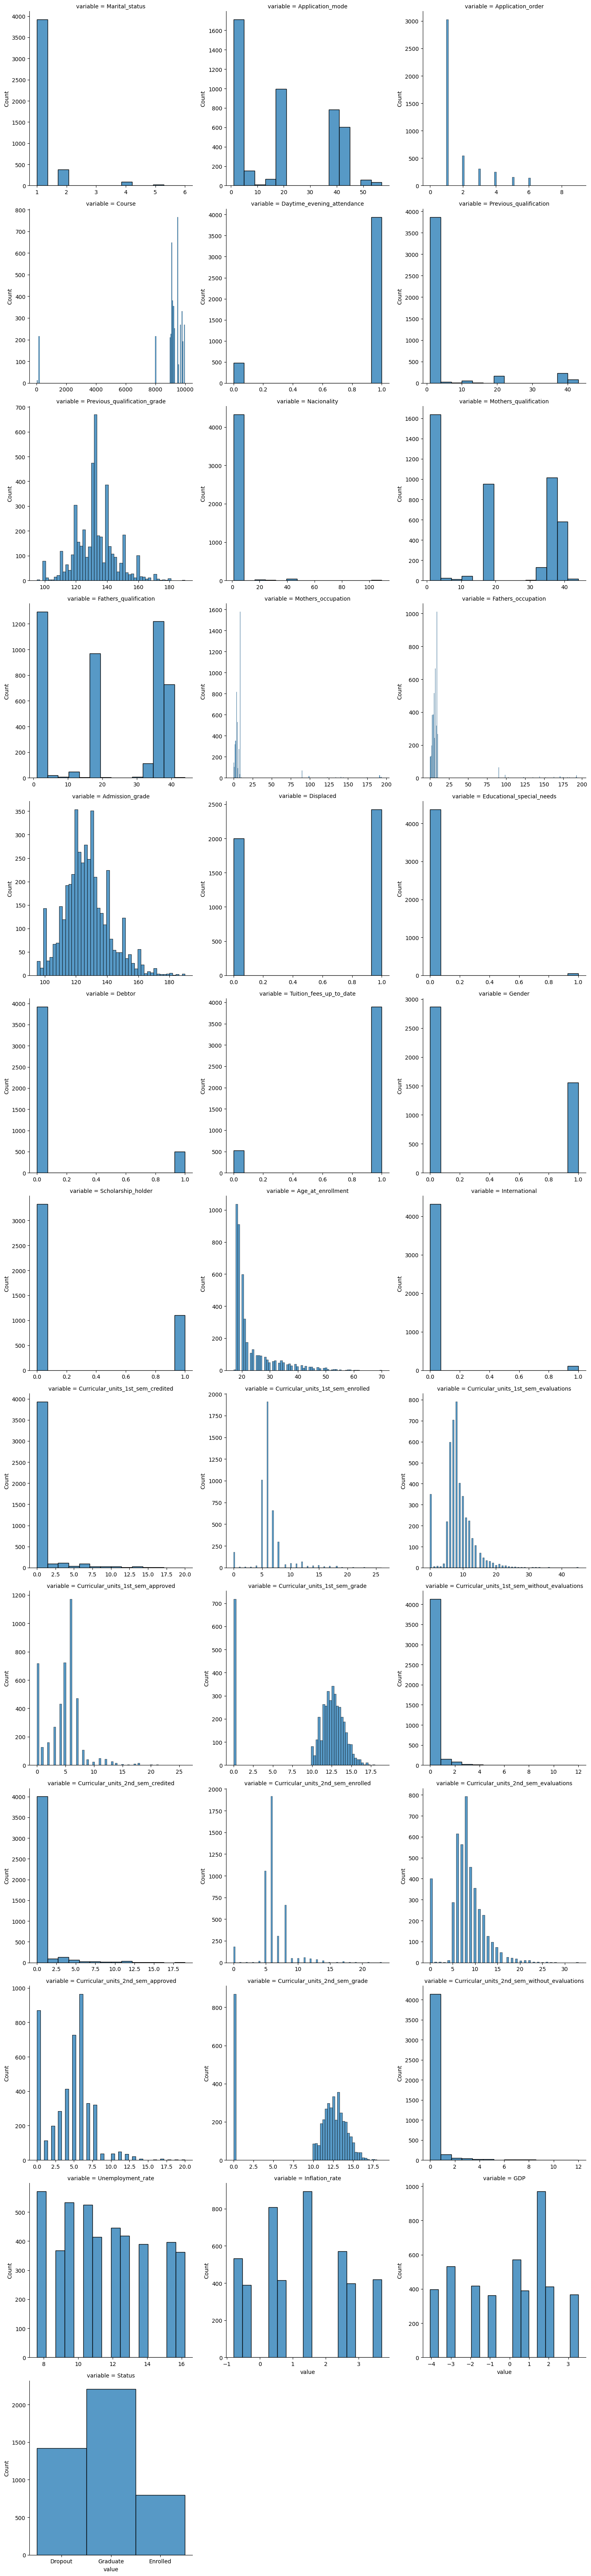

In [13]:
# check distribusi data pada data
viz(df, sns.histplot)

# Data Preparation / Preprocessing

In [14]:
# Menambah beberapa kolom
df['Economic_pressure_score'] = df['Unemployment_rate'] + df['Inflation_rate'] - df['GDP']

df['Total_enrolled_units'] = df['Curricular_units_1st_sem_enrolled'] + df['Curricular_units_2nd_sem_enrolled']
df['Total_approved_unit'] = df['Curricular_units_1st_sem_approved'] + df['Curricular_units_2nd_sem_approved']
df['Approval_rate'] = np.where( df['Total_enrolled_units'] > 0, (df['Total_approved_unit'] / df['Total_enrolled_units']) * 100, 0)

df['Average_grade'] = (df['Curricular_units_1st_sem_grade'] + df['Curricular_units_2nd_sem_grade']) / 2
df['Average_grade'] = df[['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']].mean(axis=1, skipna=True)

In [15]:
# Check data
print(f"Data missing: {df.isnull().sum().sum()}")

Data missing: 0


Menambah beberapa kolom untuk menyediakan fitur tambahan pada model klasifikasi prediksi dropout dan keberhasilan akademik mahasiswa

In [16]:
df.to_csv('data/data_students.csv', index=False)

c:\Users\wahid\Downloads\sub_2\.venv\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


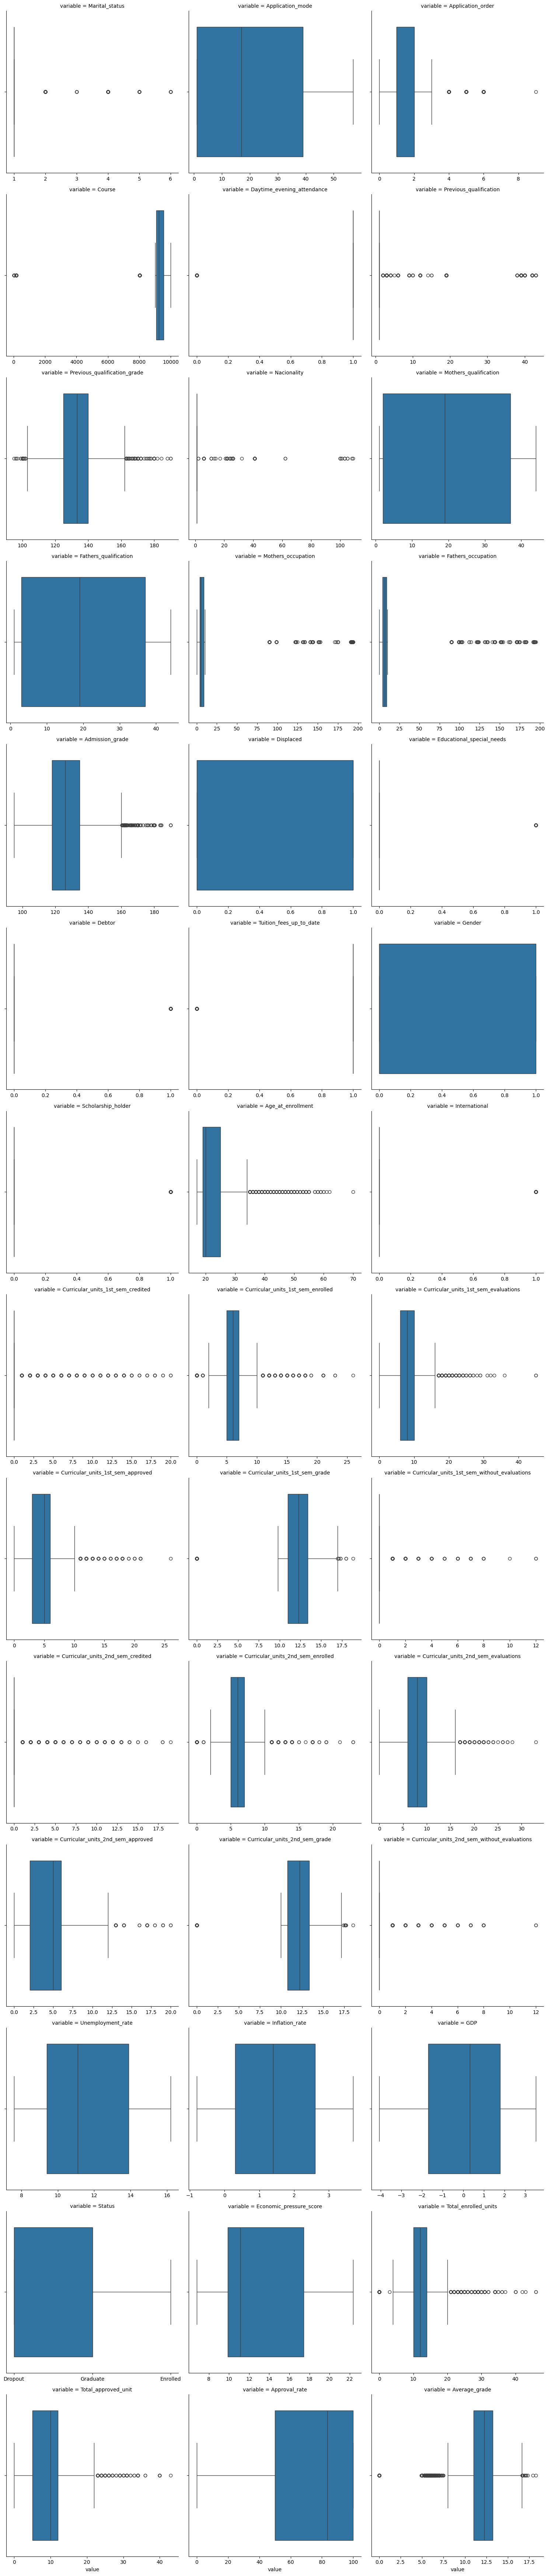

In [17]:
# check outliers plots data pada data day
viz(df, sns.boxplot)

In [18]:
# Membuat function untuk melihat outliers report
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)

Kolom-kolom dibawah ini memiliki persentase outliers yang **tinggi** untuk itu dapat kita pertimbangkan nantinya untuk dilakukan penanganan outliers, seperti menghapus nilai-nilai ekstrem tersebut pada kolom-kolom dibawah: `Marital_status`, `Application_order`, `Course`, `Daytime_evening_attendance`, `Previous_qualification`, `Debtor`, `Tuition_fees_up_to_date`, `Scholarship_holder`, `Age_at_enrollment`, `Curricular_units_1st_sem_credited`, `Curricular_units_1st_sem_enrolled`, `Curricular_units_1st_sem_grade`, `Curricular_units_1st_sem_without_evaluations`, `Curricular_units_2nd_sem_credited`, `Curricular_units_2nd_sem_grade`, `Curricular_units_2nd_sem_enrolled`, `Curricular_units_2nd_sem_without_evaluations`, `Total_enrolled_units`, `Average_grade`


In [19]:
def transform_columns(df, columns):
    for column in columns:
        # Hindari error log untuk nilai nol atau negatif
        df[f'{column}_transformed'] = np.log1p(df[column].clip(lower=0))
    return df

# Membersihkan data
df_cleaned = transform_columns(df, ["Nacionality", "Educational_special_needs", "Curricular_units_1st_sem_without_evaluations", "Curricular_units_2nd_sem_without_evaluations", "International",
                                    "Fathers_occupation", "Mothers_occupation", "Curricular_units_2nd_sem_credited", "Marital_status", "Curricular_units_1st_sem_credited"])

df_cleaned.drop(["Nacionality", "Educational_special_needs", "Curricular_units_1st_sem_without_evaluations", "Curricular_units_2nd_sem_without_evaluations", "International",
                 "Fathers_occupation", "Mothers_occupation", "Curricular_units_2nd_sem_credited", "Marital_status", "Curricular_units_1st_sem_credited"], axis=1, inplace=True)

df_cleaned.head()

,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Admission_grade,Displaced,...,Nacionality_transformed,Educational_special_needs_transformed,Curricular_units_1st_sem_without_evaluations_transformed,Curricular_units_2nd_sem_without_evaluations_transformed,International_transformed,Fathers_occupation_transformed,Mothers_occupation_transformed,Curricular_units_2nd_sem_credited_transformed,Marital_status_transformed,Curricular_units_1st_sem_credited_transformed
0,17,5,171,1,1,122.0,19,12,127.3,1,...,0.693147,0.0,0.0,0.0,0.0,2.302585,1.791759,0.0,0.693147,0.0
1,15,1,9254,1,1,160.0,1,3,142.5,1,...,0.693147,0.0,0.0,0.0,0.0,1.386294,1.386294,0.0,0.693147,0.0
2,1,5,9070,1,1,122.0,37,37,124.8,1,...,0.693147,0.0,0.0,0.0,0.0,2.302585,2.302585,0.0,0.693147,0.0
3,17,2,9773,1,1,122.0,38,37,119.6,1,...,0.693147,0.0,0.0,0.0,0.0,1.386294,1.791759,0.0,0.693147,0.0
4,39,1,8014,0,1,100.0,37,38,141.5,0,...,0.693147,0.0,0.0,0.0,0.0,2.302585,2.302585,0.0,1.098612,0.0


Lakukan pemeriksaan sekali lagi pada data yang sudah ditransform dan dihapus outliersnya

## Feature Engineering

Selanjutnya kita ubah kolom target atau `Status` kedalam bentuk numerik agar dapat dilihat korelasi antar variabelnya dengan kolom target menggunakan `LabelEncoder()`

In [20]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengubah target menjadi label numerik
y_encoded = label_encoder.fit_transform(df_cleaned['Status'])

# Mengonversi array numpy kembali ke DataFrame pandas
df_cleaned['Status'] = pd.DataFrame(y_encoded, columns=['Status'])

print("Hasil Label Encode kolom target:")
df_cleaned.head()

Hasil Label Encode kolom target:


,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Admission_grade,Displaced,...,Nacionality_transformed,Educational_special_needs_transformed,Curricular_units_1st_sem_without_evaluations_transformed,Curricular_units_2nd_sem_without_evaluations_transformed,International_transformed,Fathers_occupation_transformed,Mothers_occupation_transformed,Curricular_units_2nd_sem_credited_transformed,Marital_status_transformed,Curricular_units_1st_sem_credited_transformed
0,17,5,171,1,1,122.0,19,12,127.3,1,...,0.693147,0.0,0.0,0.0,0.0,2.302585,1.791759,0.0,0.693147,0.0
1,15,1,9254,1,1,160.0,1,3,142.5,1,...,0.693147,0.0,0.0,0.0,0.0,1.386294,1.386294,0.0,0.693147,0.0
2,1,5,9070,1,1,122.0,37,37,124.8,1,...,0.693147,0.0,0.0,0.0,0.0,2.302585,2.302585,0.0,0.693147,0.0
3,17,2,9773,1,1,122.0,38,37,119.6,1,...,0.693147,0.0,0.0,0.0,0.0,1.386294,1.791759,0.0,0.693147,0.0
4,39,1,8014,0,1,100.0,37,38,141.5,0,...,0.693147,0.0,0.0,0.0,0.0,2.302585,2.302585,0.0,1.098612,0.0


In [21]:
# Memisahkan fitur (X) dan target (y) dengan fitur (X) yang sudah ditetapkan sebelumnya
feature_x= ['Application_mode', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'Previous_qualification_grade',
            'Admission_grade', 'Displaced', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
            'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Total_enrolled_units',
            'Total_approved_unit', 'Approval_rate', 'Average_grade']
X = df_cleaned[feature_x]
y = df_cleaned['Status']

# Inisialisasi StandardScaler untuk standarisasi data numerikal
scaler = StandardScaler()

#   Menerapkan scaling pada kolom numerikal
X_scaled = scaler.fit_transform(X)

# Mengonversi array numpy kembali ke DataFrame pandas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Hasil scaling kolom numerikal:")
X_scaled.head()

Hasil scaling kolom numerikal:


,Application_mode,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Previous_qualification_grade,Admission_grade,Displaced,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Total_enrolled_units,Total_approved_unit,Approval_rate,Average_grade
0,-0.095470,-0.358167,0.368135,1.357640,-0.574914,-0.430363,-0.804841,0.022229,0.907512,-2.528560,-1.521257,-2.197102,-2.838337,-1.471527,-1.963489,-2.713086,-1.533977,-1.876398,-2.165950
1,-0.209869,-0.358167,-2.716392,1.357640,-0.574914,-0.562168,2.076819,1.071926,0.907512,-0.109105,0.418050,0.693599,-0.105726,0.518904,0.659562,-0.109088,0.479467,0.886766,0.705237
2,-1.010660,-0.358167,-2.716392,1.357640,-0.574914,-0.562168,-0.804841,-0.150419,0.907512,-0.109105,-1.521257,-2.197102,-0.105726,-1.471527,-1.963489,-0.109088,-1.533977,-1.876398,-2.165950
3,-0.095470,-0.358167,0.368135,-0.736572,-0.574914,-0.430363,-0.804841,-0.509526,0.907512,-0.109105,0.418050,0.575611,-0.105726,0.187165,0.416450,-0.109088,0.311680,0.656503,0.514483
4,1.162916,-0.358167,0.368135,-0.736572,-0.574914,2.864765,-2.473171,1.002867,-1.101914,-0.109105,0.094832,0.349468,-0.105726,0.518904,0.531608,-0.109088,0.311680,0.656503,0.463088


In [22]:
# Memisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menggunakan SMOTE pada data training untuk menangani imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("Distribusi target setelah oversampling:")
print(pd.Series(y_res).value_counts())

Distribusi target setelah oversampling:
Status
0    1791
1    1791
2    1791
Name: count, dtype: int64


# Modeling

### Logistic Regression

Parameter yang digunakan:

- random_state = 42: Digunakan untuk memastikan hasil model dapat direproduksi dengan memberikan seed yang tetap.
- max_iter = melakukan iterasi dengan maksimal iterasi sebanyak 1000

Dalam implementasi ini, **`LogisticRegression()`** menggunakan semua parameter default dengan penyetelan khusus `random_state` dan `max_iter`. Hasil model diukur dengan menggunakan akurasi train dan test serta confusion matriks.

In [23]:
# Inisialisasi model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Melatih model
log_reg.fit(X_res, y_res)

# Prediksi
y_pred_test_lr = log_reg.predict(X_test)
y_pred_train_lr = log_reg.predict(X_res)

# Evaluasi
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_res)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.7306904894844594
Logistic Regression - accuracy_test: 0.7468926553672316


### SVM

Parameter yang digunakan:

- random_state = 42: Digunakan untuk memastikan hasil model dapat direproduksi dengan memberikan seed yang tetap.
- probability = True: digunakan untuk parameter yang dipelajari dalam
Penskalaan Platt untuk menghasilkan estimasi probabilitas dari nilai keputusan.

Dalam implementasi ini, **`SVM()`** menggunakan semua parameter default dan penyetelan khusus pada `random_state` dan `probability`. Hasil model diukur dengan menggunakan akurasi train dan test serta confusion matriks.

In [24]:
# Inisialisasi model
svm_classifier = SVC(random_state=42, probability=True)

# Melatih model
svm_classifier.fit(X_res, y_res)

# Prediksi
y_pred_test_svm = svm_classifier.predict(X_test)
y_pred_train_svm = svm_classifier.predict(X_res)

# Evaluasi
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_res)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

print('SVM - accuracy_train:', accuracy_train_svm)
print('SVM - accuracy_test:', accuracy_test_svm)

SVM - accuracy_train: 0.7746138097896892
SVM - accuracy_test: 0.7367231638418079


### Random Forest Classifier

Parameter yang digunakan:

- random_state = 42: Digunakan untuk memastikan hasil model dapat direproduksi dengan memberikan seed yang tetap.

Dalam implementasi ini, **`RandomForestClassifier()`** menggunakan semua parameter default dan penyetelan khusus pada `random_state`. Hasil model diukur dengan menggunakan akurasi train dan test serta confusion matriks.

In [25]:
# Inisialisasi model
rf_classifier = RandomForestClassifier(random_state=42)

# Melatih model
rf_classifier.fit(X_res, y_res)

# Prediksi
y_pred_test_rfc = rf_classifier.predict(X_test)
y_pred_train_rfc = rf_classifier.predict(X_res)

# Evaluasi
accuracy_train_rfc = accuracy_score(y_pred_train_rfc, y_res)
accuracy_test_rfc = accuracy_score(y_pred_test_rfc, y_test)

print('Random Forest Classifier - accuracy_train:', accuracy_train_rfc)
print('Random Forest Classifier - accuracy_test:', accuracy_test_rfc)

Random Forest Classifier - accuracy_train: 1.0
Random Forest Classifier - accuracy_test: 0.7593220338983051


#### Hyperparameter Tuning Using Random Forest Classifier

Pada tahapan hyperparameter tuning ini kita mencari kombinasi parameter yang paling optimal untuk model machine learning yang kita guna meningkatkan performanya. Pada tahapan ini kita mencoba mencari parameter yang cocok dengan parameter yang dituning adalah `n_estimators` (50, 100, 200), `max_depth` (10, 20, None), `min_sample_split` (2, 5, 10), `max_features` (None, sqrt, log2)

In [26]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_res, y_res)

best_rf_model = grid_search.best_estimator_
print("Best Random Forest Accuracy Train:", grid_search.best_score_)

y_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Best Random Forest Accuracy Test:", test_accuracy)

Best Random Forest Accuracy Train: 0.8217010980830075
Best Random Forest Accuracy Test: 0.7536723163841808


# Evaluation

In [27]:
print("Logistic Regression:")
print(classification_report(y_test, y_pred_test_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       316
           1       0.44      0.59      0.50       151
           2       0.85      0.83      0.84       418

    accuracy                           0.75       885
   macro avg       0.70      0.71      0.70       885
weighted avg       0.77      0.75      0.76       885



In [28]:
print("SVM:")
print(classification_report(y_test, y_pred_test_svm))

SVM:
              precision    recall  f1-score   support

           0       0.87      0.68      0.77       316
           1       0.41      0.61      0.49       151
           2       0.83      0.83      0.83       418

    accuracy                           0.74       885
   macro avg       0.71      0.71      0.69       885
weighted avg       0.77      0.74      0.75       885



In [29]:
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_test_rfc))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       316
           1       0.47      0.44      0.46       151
           2       0.80      0.89      0.84       418

    accuracy                           0.76       885
   macro avg       0.70      0.69      0.70       885
weighted avg       0.76      0.76      0.76       885



# Saved Model

In [ ]:
# Simpan model Random Forest
joblib.dump(rf_classifier, 'model/rf_model.pkl')
joblib.dump(scaler, 'model/scaller.pkl')
joblib.dump(label_encoder, 'model/label_lencoder.pkl')

['model/labe_lencoder.pkl']